In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

C:\Users\cnavarreteliz\AppData\Roaming\Python\Python39\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [2]:
gdf = gpd.read_file("https://raw.githubusercontent.com/wmgeolab/geoBoundaries/a1c1bd60e76864bc4cce64b59f32fb182b64562a/releaseData/gbOpen/ROU/ADM1/geoBoundaries-ROU-ADM1.geojson")
gdf.head()

,shapeName,Level,shapeISO,shapeID,shapeGroup,shapeType,geometry
0,ALBA,ADM1,RO-AB,ROU-ADM1-36066543B14713050,ROU,ADM1,"POLYGON ((22.81197 46.56901, 22.81174 46.56895..."
1,ARAD,ADM1,RO-AR,ROU-ADM1-36066543B68809662,ROU,ADM1,"POLYGON ((22.67658 46.40583, 22.67633 46.40574..."
2,ARGES,ADM1,RO-AG,ROU-ADM1-36066543B61071366,ROU,ADM1,"POLYGON ((25.32124 45.38138, 25.32107 45.38143..."
3,BACAU,ADM1,RO-BC,ROU-ADM1-36066543B33316923,ROU,ADM1,"POLYGON ((27.20625 46.76987, 27.20598 46.76973..."
4,BIHOR,ADM1,RO-BH,ROU-ADM1-36066543B91671333,ROU,ADM1,"POLYGON ((22.81197 46.56901, 22.81243 46.56916..."


In [4]:
year = 2009
country = "Romania"
location_level = "county_name"

In [7]:
df = pd.read_csv(f"data_output/{country}/{year}_divisiveness_{location_level}.csv.gzip", compression="gzip")
df = df.dropna()
df["county_name"] = df["county_name"].str.upper()
df.head()

,county_name,candidate,value
0,ALBA,Constantin Ninel Potârcă,0.005179
1,ALBA,Constantin Rotaru,0.005908
2,ALBA,Corneliu Vadim Tudor,0.030255
3,ALBA,Crin Antonescu,0.101979
4,ALBA,George Becali,0.017440


In [ ]:
pd.merge(df, gdf, left_on="county_name", right_on="shapeName", how="outer")

In [9]:
df.candidate.unique()

array(['Constantin Ninel Potârcă', 'Constantin Rotaru',
       'Corneliu Vadim Tudor', 'Crin Antonescu', 'George Becali',
       'Gheorghe-Eduard Manole', 'Hunor Kelemen', 'Mircea Geoană',
       'Ovidiu Cristian Iane', 'Remus Cernea', 'Sorin Oprescu',
       'Traian Băsescu'], dtype=object)

(19.789276790791067, 30.187919475763074, 43.386705176366725, 48.49771148062704)

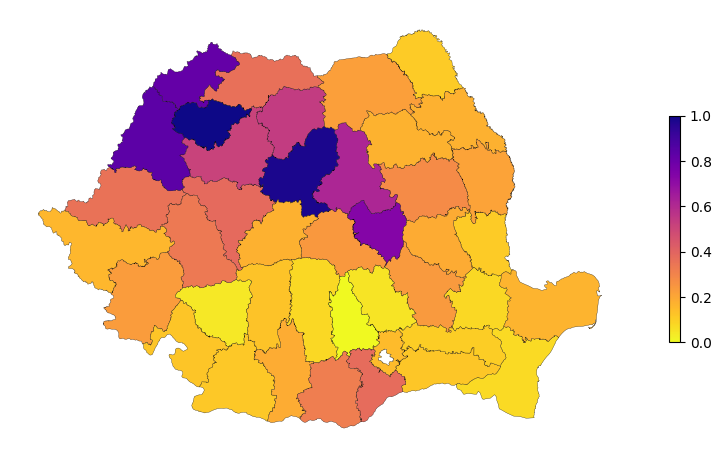

In [8]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)

data_tmp = df.groupby(["county_name"]).agg({"value": "mean"}).reset_index()
data_tmp = pd.merge(data_tmp, gdf, left_on="county_name", right_on="shapeName")

data_tmp = gpd.GeoDataFrame(data_tmp)
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

data_tmp["value"] = NormalizeData(data_tmp["value"])

data_tmp.plot(
    column="value", 
    edgecolor="black",
    cmap="plasma_r",
    lw=0.2,
    ax=ax, 
    legend=True, 
    legend_kwds=dict(
        shrink=0.3
    )
)

plt.axis("off")

(19.789276790791067, 30.187919475763074, 43.386705176366725, 48.49771148062704)

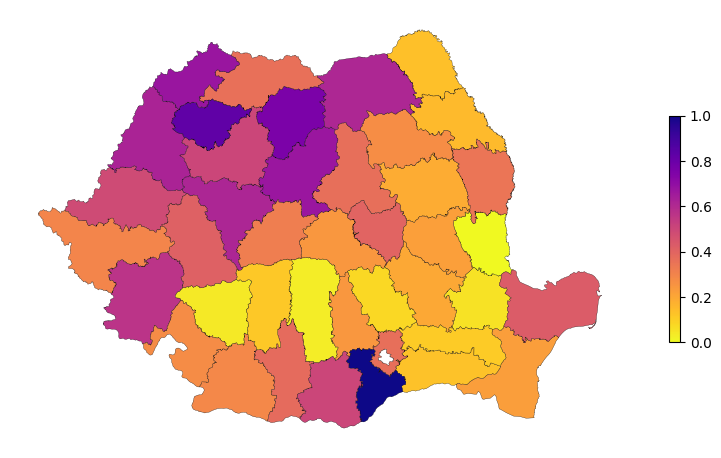

In [10]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)

data_tmp = df[df["candidate"] == "Traian Băsescu"]
data_tmp = pd.merge(data_tmp, gdf, left_on="county_name", right_on="shapeName")

data_tmp = gpd.GeoDataFrame(data_tmp)
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

data_tmp["value"] = NormalizeData(data_tmp["value"])

data_tmp.plot(
    column="value", 
    edgecolor="black",
    cmap="plasma_r",
    lw=0.2,
    ax=ax, 
    legend=True, 
    legend_kwds=dict(
        shrink=0.3
    )
)

plt.axis("off")

(19.789276790791067, 30.187919475763074, 43.386705176366725, 48.49771148062704)

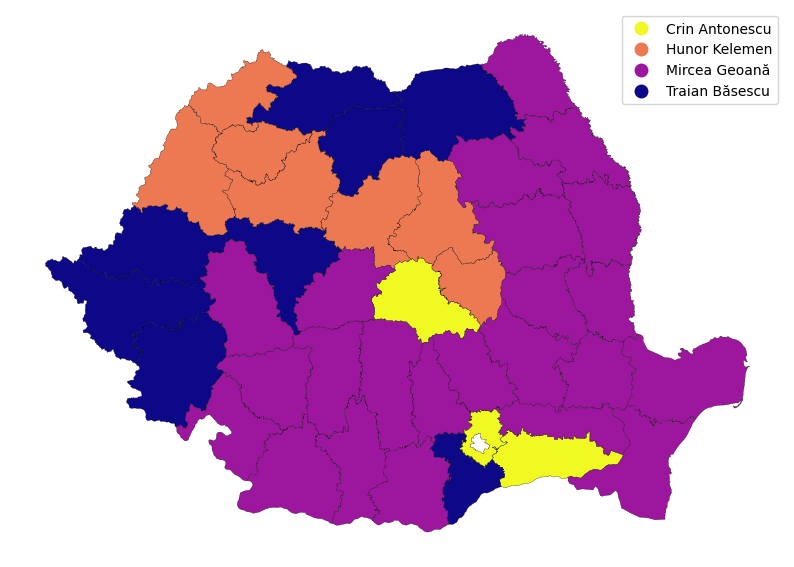

In [11]:
df["rank"] = df.groupby("county_name")["value"].rank(ascending=False).astype(int)

fig, ax = plt.subplots(figsize=(10, 10), dpi=100)

data_tmp = df[df["rank"] == 1]
data_tmp = pd.merge(data_tmp, gdf, left_on="county_name", right_on="shapeName")

data_tmp = gpd.GeoDataFrame(data_tmp)
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# data_tmp["value"] = NormalizeData(data_tmp["value"])

data_tmp.plot(
    column="candidate", 
    edgecolor="black",
    cmap="plasma_r",
    lw=0.2,
    ax=ax, 
    legend=True, 
    legend_kwds=dict(
#         shrink=0.3
    )
)

plt.axis("off")